In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
house=pd.read_csv('C:\\Users\\Goksun\\Downloads\\train (3).csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housee=house[['MSSubClass','Neighborhood','Condition2',
                          'OverallCond','Exterior1st','ExterCond','Heating','SaleType','SalePrice']]
housee.head()

,MSSubClass,Neighborhood,Condition2,OverallCond,Exterior1st,ExterCond,Heating,SaleType,SalePrice
0,60,CollgCr,Norm,5,VinylSd,TA,GasA,WD,208500
1,20,Veenker,Norm,8,MetalSd,TA,GasA,WD,181500
2,60,CollgCr,Norm,5,VinylSd,TA,GasA,WD,223500
3,70,Crawfor,Norm,5,Wd Sdng,TA,GasA,WD,140000
4,60,NoRidge,Norm,5,VinylSd,TA,GasA,WD,250000


In [6]:
SubClassDict = {20: "1-STORY 1946 & NEWER ALL STYLES", 
        30: "1-STORY 1945 & OLDER", 
        40: "1-STORY W/FINISHED ATTIC ALL AGES", 
        45: "1-1/2 STORY - UNFINISHED ALL AGES", 
        50: "1-1/2 STORY FINISHED ALL AGES", 
        60: "2-STORY 1946 & NEWER", 
        70: "2-STORY 1945 & OLDER", 
        75: "2-1/2 STORY ALL AGES", 
        80: "SPLIT OR MULTI-LEVEL", 
        85: "SPLIT FOYER", 
        90: "DUPLEX - ALL STYLES AND AGES", 
       120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER", 
       150: "1-1/2 STORY PUD - ALL AGES", 
       160: "2-STORY PUD - 1946 & NEWER", 
       180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER", 
       190: "2 FAMILY CONVERSION - ALL STYLES AND AGES"}

In [7]:
OverallCondDict={10:"Very Excellent",
       9:"Excellent",
       8:"Very Good",
       7:"Good",
       6:"Above Average",
       5:"Average",
       4:"Below Average",
       3:"Fair",
       2:"Poor",
       1:"Very Poor"}

In [8]:
housee.MSSubClass = housee.MSSubClass.astype('category')
housee.OverallCond= housee.OverallCond.astype('category')

In [9]:
housee.MSSubClass.map(SubClassDict).head()

0               2-STORY 1946 & NEWER
1    1-STORY 1946 & NEWER ALL STYLES
2               2-STORY 1946 & NEWER
3               2-STORY 1945 & OLDER
4               2-STORY 1946 & NEWER
Name: MSSubClass, dtype: category
Categories (15, object): [1-STORY 1946 & NEWER ALL STYLES, 1-STORY 1945 & OLDER, 1-STORY W/FINISHED ATTIC ALL AGES, 1-1/2 STORY - UNFINISHED ALL AGES, ..., 1-STORY PUD (Planned Unit Development) - 1946 ..., 2-STORY PUD - 1946 & NEWER, PUD - MULTILEVEL - INCL SPLIT LEV/FOYER, 2 FAMILY CONVERSION - ALL STYLES AND AGES]

In [10]:
housee.OverallCond.map(OverallCondDict).head()

0      Average
1    Very Good
2      Average
3      Average
4      Average
Name: OverallCond, dtype: category
Categories (9, object): [Very Poor, Poor, Fair, Below Average, ..., Above Average, Good, Very Good, Excellent]

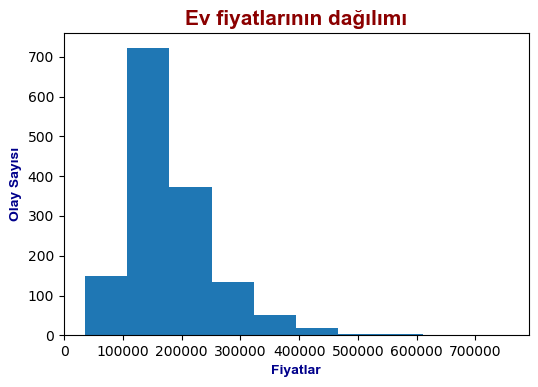

In [11]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(6,4), dpi = 100)

plt.hist(housee.SalePrice)
plt.title("Ev fiyatlarının dağılımı", fontdict = baslik_font)
plt.xlabel("Fiyatlar", fontdict=eksen_font)
plt.ylabel("Olay Sayısı", fontdict=eksen_font)
plt.show()

In [12]:
house1=pd.concat([housee,pd.get_dummies(housee[['Neighborhood','Condition2',
                 'Exterior1st','ExterCond','Heating','SaleType','MSSubClass','OverallCond']])],axis=1)
                 .drop(columns=['Neighborhood','Condition2',
                                'Exterior1st','ExterCond','Heating','SaleType','MSSubClass','OverallCond'],axis=1)

In [14]:
y=house1['SalePrice']
x=house1.drop('SalePrice',axis=1)

In [15]:
import statsmodels.api as sm
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     32.85
Date:                Mon, 27 Apr 2020   Prob (F-statistic):          2.71e-269
Time:                        00:29:40   Log-Likelihood:                -17740.
No. Observations:                1460   AIC:                         3.565e+04
Df Residuals:                    1375   BIC:                         3.610e+04
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 8.255e+04   1.25e+04      6.595      0.000     5.8e+04    1.07e+05
Neighborhood_Blmngtn   4.23e+04   1.27e+04      3.320      0.001    1.73e+04    6.73e+04
Neighborhood_Blueste  1.032e+04   3.34e+04      0.309      0.757   -5.52e+04    7.58e+04
Neighborhood_BrDale  -2.127e+04   1.41e+04     -1.505      0.133    -4.9e+04    6454.795
Neighborhood_BrkSide -4.023e+04   7973.481     -5.045      0.000   -5.59e+04   -2.46e+04
Neighborhood_ClearCr  1.949e+04   9259.893      2.105      0.035    1328.333    3.77e+04
Neighborhood_CollgCr   108.4102   5116.060      0.021      0.983   -9927.717    1.01e+04
Neighborhood_Crawfor  1.393e+04   7778.644      1.791      0.073   -1326.519    2.92e+04
Neighborhood_Edwards -4.477e+04   5524.119     -8.105      0.000   -5.56e+04   -3.39e+04
Neighborhood_Gilbert -1.791e+04   6444.122     -2.780      0.006   -3.06e+04   -5272.165
Neighborhood_IDOTRR   -6.72e+04   9031.010     -7.441      0.000   -8.49e+04   -4.95e+04
Neighborhood_MeadowV -7.936e+04   1.62e+04     -4.901      0.000   -1.11e+05   -4.76e+04
Neighborhood_Mitchel -2.292e+04   7296.058     -3.141      0.002   -3.72e+04   -8603.560
Neighborhood_NAmes   -4.199e+04   4453.853     -9.428      0.000   -5.07e+04   -3.33e+04
Neighborhood_NPkVill   413.0911   1.67e+04      0.025      0.980   -3.23e+04    3.31e+04
Neighborhood_NWAmes  -8701.1979   6377.149     -1.364      0.173   -2.12e+04    3808.797
Neighborhood_NoRidge  1.306e+05   8147.964     16.031      0.000    1.15e+05    1.47e+05
Neighborhood_NridgHt  1.172e+05   6406.778     18.300      0.000    1.05e+05     1.3e+05
Neighborhood_OldTown -5.566e+04   6267.736     -8.881      0.000    -6.8e+04   -4.34e+04
Neighborhood_SWISU   -4.078e+04   1.05e+04     -3.887      0.000   -6.14e+04   -2.02e+04
Neighborhood_Sawyer  -4.608e+04   6274.131     -7.344      0.000   -5.84e+04   -3.38e+04
Neighborhood_SawyerW    18.1065   6727.597      0.003      0.998   -1.32e+04    1.32e+04
Neighborhood_Somerst  2.727e+04   6098.244      4.473      0.000    1.53e+04    3.92e+04
Neighborhood_StoneBr  1.236e+05   9980.846     12.388      0.000    1.04e+05    1.43e+05
Neighborhood_Timber   4.169e+04   8101.911      5.146      0.000    2.58e+04    5.76e+04
Neighborhood_Veenker  4.236e+04   1.46e+04      2.897      0.004    1.37e+04    7.11e+04
Condition2_Artery    -1.561e+04   3.33e+04     -0.468      0.640    -8.1e+04    4.98e+04
Condition2_Feedr     -2.259e+04   2.29e+04     -0.988      0.323   -6.74e+04    2.23e+04
Condition2_Norm      -1717.5406   1.31e+04     -0.131      0.896   -2.74e+04     2.4e+04
Condition2_PosA       1.482e+05   5.34e+04      2.775      0.006    4.34e+04    2.53e+05
Condition2_PosN      -3.315e+04   3.31e+04     -1.002      0.316    -9.8e+04    3.17e+04
Condition2_RRAe       5.498e+04   4.41e+04      1.247    